# IMPORT OF LIBRAIRIES 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import calendar
from functions import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adrien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# INTRODUCTION

In this section, we will present our procedure to identify the major events related to climate change that took place during the scope of our study.
To simplify our presentation we will focus on the year 2020 but this procedure will be extended to the entire data set later on.
The objective is to identify the date of these events by determining the days where the number of citations related to climate change is the most important.
We have therefore built a preliminary lexicon containing the terms most frequently used by speakers commenting about the climate emergency ( such as "climate change", "COP26",...)
This lexicon is a first draft and will be improved later by a more precise method involving a larger lexicon or a more advanced selection method.
With this lexicon we can filter our data and create a dataframe containing only the climate-related quotations for each year and this reduced dataframes will be used throughout our study.
Every dataframes and methodology to construct them can be found in notebook "Playground"

In this notebook we use only the dataframe for the year 2020

After building these dataframe, we can identify the days where the number of quotes related to climate is the most important.
Finally, we can identify the most frequently used words by the speakers and thus try to determine if a significant event took place on the day of this peak in the number of quotations



### LOADING DATA SET FOR THE YEAR 2020

In [2]:
quotes_2020 = pd.io.json.read_json('quotes-2020_climate.json.bz2', lines = True)

### Creation of a column containing the month when the month when the quote was reported


In [3]:
quotes_2020['month'] = quotes_2020['date'].dt.month.apply(lambda x: calendar.month_abbr[x])   
quotes_2020

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,nationality,gender,ethnic_group,occupation,party,religion,date_of_birth,month
0,2020-02-27-004325,And it's also in the context of decades of utt...,None,[],2020-02-27 15:17:36,1,"[[None, 0.8786], [Bernie Sanders, 0.1214]]",[http://www.eenews.net/stories/1062457547],E,Thursday,None,None,None,None,None,None,NaN,Feb
1,2020-01-29-062975,Many make the link today between their experie...,Peter Maurer,"[Q117796, Q42426597]",2020-01-29 09:04:36,5,"[[Peter Maurer, 0.8787], [None, 0.1213]]",[http://whbl.com/news/articles/2020/jan/29/hun...,E,Wednesday,None,None,None,None,None,None,NaN,Jan
2,2020-02-10-076321,the National Energy and Climate Plans are how ...,Kadri Simson,[Q13570003],2020-02-10 05:51:51,1,"[[Kadri Simson, 0.9269], [None, 0.0504], [Gret...",[https://www.politico.eu/newsletter/brussels-p...,E,Monday,Estonia,female,None,politician,Estonian Centre Party,None,+1977-01-22T00:00:00Z,Feb
3,2020-01-06-069057,"This budget also allows us to earmark £ 500,00...",John Whitehead,"[Q55436000, Q58150131, Q6263827, Q6263833, Q62...",2020-01-06 11:49:00,1,"[[John Whitehead, 0.7971], [None, 0.2029]]",[https://www.buryfreepress.co.uk/news/draft-bu...,E,Monday,None,None,None,None,None,None,NaN,Jan
4,2020-03-10-005294,"As a state, we will pursue every option availa...",Kate Brown,"[Q16727692, Q6375399]",2020-03-10 20:47:28,2,"[[Kate Brown, 0.7275], [None, 0.2726]]",[http://www.courthousenews.com/oregon-governor...,E,Tuesday,None,None,None,None,None,None,NaN,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,2020-02-05-114487,We will be an energetic champion of free trade...,Dominic Raab,[Q268584],2020-02-05 16:30:31,2,"[[Dominic Raab, 0.8813], [None, 0.0998], [Geor...",[http://forbesadvocate.com.au/story/6616761/au...,E,Wednesday,United Kingdom,male,None,"[politician, lawyer]",Conservative Party,None,+1974-02-25T00:00:00Z,Feb
10222,2020-02-21-007763,Both urgent and long-term actions are needed t...,None,[],2020-02-21 20:23:47,1,"[[None, 0.7482], [Greta Thunberg, 0.2518]]",[http://feeds.inquisitr.com/~r/google/yDYq/~3/...,E,Friday,None,None,None,None,None,None,NaN,Feb
10223,2020-04-10-020959,If we re-elect Donald Trump because we have tu...,None,[],2020-04-10 00:00:00,1,"[[None, 0.5234], [Mike Doyle, 0.4509], [Jim Bu...",[http://wesa.fm/post/mike-doyle-face-progressi...,E,Friday,None,None,None,None,None,None,NaN,Apr
10224,2020-02-10-057505,"Obama got health care, Trump got his tax cut, ...",Tom Steyer,[Q16189531],2020-02-10 11:00:08,1,"[[Tom Steyer, 0.8143], [None, 0.1857]]",[https://thebulletin.org/2020/02/on-the-new-ha...,E,Monday,United States of America,male,None,"[businessperson, organizational founder, phila...",Democratic Party,None,+1957-06-27T00:00:00Z,Feb


In [4]:
quotes_2020['date'] = quotes_2020['date'].dt.date

### Here create a serie containing the number of quotations per day in descending order 

In [5]:
quotes_date_occurence = quotes_2020.groupby('date').date.count()
quotes_date_occurence = quotes_date_occurence.sort_values(ascending= False)
quotes_date_occurence.head(5)

date
2020-01-14    248
2020-01-15    228
2020-01-21    221
2020-02-06    219
2020-02-07    213
Name: date, dtype: int64

### We then select  the quotations reported on peak days 

In [6]:
top_ten_days = quotes_date_occurence.index[:10].astype(str)
quotations_peak  = quotes_2020[quotes_2020['date'].astype(str).apply(lambda x: x in top_ten_days.to_list())]

## Plot of the number of quotations reported per day 

Text(0.5, 1.0, 'Number of quotations reported per day ')

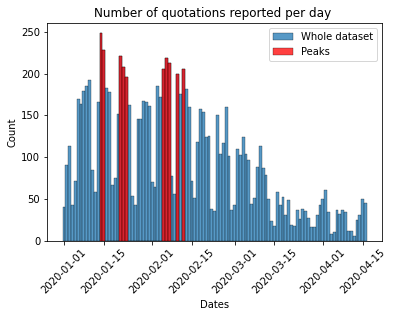

In [7]:
sns.histplot(quotes_2020['date'], bins = len(quotes_date_occurence), label = "Whole dataset")
sns.histplot(quotations_peak['date'], color = 'red', label = "Peaks") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()
plt.title('Number of quotations reported per day ')


## Plot of the quotations reported per month

Text(-2.700000000000003, 0.5, 'Count')

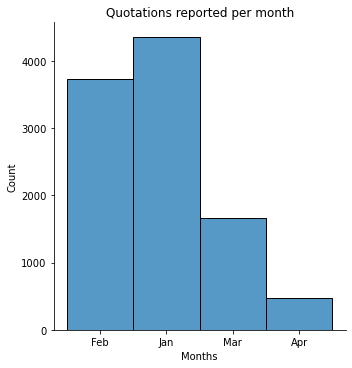

In [8]:
sns.displot(quotes_2020['month'])
plt.title('Quotations reported per month')
plt.xlabel("Months")
plt.ylabel("Count")

##  Identification of  the most frequently used words by the speakers when the peak occured

The goal here is to observe the most frequent words, and see if we can establish a link to a particular event.


## First we will look at the frequency of  words starting with a capital letter 

We do this in order to to find more easily the countries where these major events occured or the names of some  people.
These words can be very useful keywords.

In [9]:
key_capital_words = []
top_ten_days = quotes_date_occurence.index[:10].astype(str)
for d in top_ten_days:
    _, capital_words = capital_letter_keywords(quotes_2020, d)
    key_capital_words.append(capital_words)


 We show in the following dataframe, the most frequent keywords starting with a capital letter for the 10 days where quotations on climate change were predominant.

In [10]:
top_ten_day_key_words_capital = pd.DataFrame(key_capital_words, index = quotes_date_occurence.index[:10]).fillna(0)
top_ten_day_key_words_capital

,Australia,BlackRock,Minister,Canada,UK,Government,Michaels,COP26,Glasgow,BP,Scottish,Greta,Britain,Trump
date,,,,,,,,,,,,,,
2020-01-14,21.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-15,13.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-06,0.0,0.0,0.0,0.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-07,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12,0.0,0.0,0.0,0.0,14.0,8.0,0.0,12.0,8.0,8.0,7.0,0.0,0.0,0.0
2020-02-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,7.0,0.0


Next we look at the frequency of all words.

 This time, we show in the following dataframe, the most frequent keywords for the 10 days where quotations on climate change were predominant.

In [11]:
keywords = []
top_ten_days = quotes_date_occurence.index[:10].astype(str)
for d in top_ten_days:
    _, words = all_keywords(quotes_2020, d)
    keywords.append(words)

In [12]:
top_ten_day_keywords = pd.DataFrame(keywords, index = quotes_date_occurence.index[:10]).fillna(0)
top_ten_day_keywords

,people,Australia,need,around,impacts,fire,country,much,economy,emergency,...,communities,COP26,already,health,life,would,year,nuclear,state,political
date,,,,,,,,,,,,,,,,,,,,,
2020-01-14,26.0,21.0,17.0,16.0,15.0,15.0,14.0,14.0,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-15,21.0,13.0,14.0,12.0,0.0,0.0,0.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,22.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-06,15.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-07,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,21.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-05,18.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12,18.0,0.0,33.0,0.0,0.0,0.0,11.0,0.0,0.0,15.0,...,12.0,12.0,11.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0
2020-02-10,26.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0


From the different results, we see that "Australia" and "fire" are amidst the most frequent words
on the 14th of January.

This indicates that the event that "boosted" the number of quotes about the climate during this time is probably the big australian wildfires that began at the end of 2019. We should explore this option now.


##  We therefore explore what happened on the 14th of  january...

The most important peak occured on the 14th of January. 

We will then, try to determine if a particular event occured.

In [13]:
filtered_sentence_df_australia,count_capital_keywords_australia =  capital_letter_keywords(
    quotes_2020, '2020-01-14')
_,count_keywords_australia = all_keywords(quotes_2020, '2020-01-14' )


In [14]:
count_capital_keywords_australia

Australia    21
BlackRock    11
dtype: int64

In [15]:
count_keywords_australia 

people       26
Australia    21
need         17
around       16
impacts      15
fire         15
country      14
much         14
economy      13
emergency    13
energy       13
address      13
dtype: int64

From these previous results, evidences accumulate on the nature of this peak. In order to validate it with a manual manipulation, we try to look for the word "bushfire" on this date here below. We observe 14 occurences. This is way too specific to be a coincidence.

In [16]:
filtered_sentence_df_australia.str.contains('bushfire').sum()

14

This link from this precise period validates our expectation : https://edition.cnn.com/2020/01/01/australia/australia-fires-explainer-intl-hnk-scli/index.html

In [17]:

 

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Other NLP
import re
import spacy

from nltk.corpus import stopwords

# General Plotting
import matplotlib.pyplot as plt
 
import seaborn as sns


# Special Plotting
import pyLDAvis
import pyLDAvis.gensim_models 

# ignore some warnings 
import warnings
warnings.filterwarnings('ignore')

# Set the maximum number of rows displayed by pandas
pd.options.display.max_rows = 1000

# Set some CONSTANTS that will be used later
SEED    = 41  # base to generate a random number


### Australia

In [18]:
australia = quotations_peak[quotations_peak.date.astype(str) =='2020-01-14']

In [19]:
! python -m spacy download en_core_web_sm

  Using cached en_core_web_sm-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [20]:
spacy.load('en_core_web_sm')

In [21]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def preprocess(txt):
    txt = " ".join(simple_preprocess(txt))
    
    
    
    return txt


In [23]:
australia['quotation'] = australia['quotation'].apply(lambda x : preprocess(x))

In [24]:

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/adrien/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
def lemmatize_text(txt):
    word_tokens = word_tokenize(txt)
    lemmatized_output = [WordNetLemmatizer().lemmatize(w) for w in word_tokens ]
    
    
    return lemmatized_output

In [26]:
australia['quotation'] = australia['quotation'].apply(lambda x : lemmatize_text(x))



In [27]:
# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

dictionary = corpora.Dictionary(australia['quotation'])



In [28]:
#Filter out tokens that appear in
#less than 15 documents (absolute number) or
#more than 0.5 documents (fraction of total corpus size, not absolute number).
#after the above two steps, keep only the first 100000 most frequent tokens.

dictionary.filter_extremes(no_below = 10, no_above=0.1, keep_n= 200)

## Gensim doc2bow

In [29]:
#For each document we create a dictionary reporting how many
#words and how many times those words appear. Save this to ‘bow_corpus’, 
#then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(q) for q in australia['quotation']]
bow_corpus[12] #(token id, token count for document 12)

[(1, 1),
 (37, 1),
 (48, 1),
 (57, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1)]

## Result for the document 12

In [30]:
bow_doc_12 = bow_corpus[12]
print("Result for the document 12\n") 
for i in range(len(bow_doc_12)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_12[i][0], 
                                               dictionary[bow_doc_12[i][0]], bow_doc_12[i][1]))


Result for the document 12

Word 1 ("effect") appears 1 time.
Word 37 ("they") appears 1 time.
Word 48 ("need") appears 1 time.
Word 57 ("weather") appears 1 time.
Word 82 ("a") appears 1 time.
Word 83 ("ever") appears 1 time.
Word 84 ("greater") appears 1 time.
Word 85 ("individual") appears 1 time.
Word 86 ("severe") appears 1 time.


In [31]:
#lda_model = gensim.models.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes = 2)

### LDA model

In [32]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics= 10, id2word=dictionary, passes=2, workers = 2)

 ## Visualization of the top keywwords for each model (topics)

In [33]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.040*"a" + 0.040*"world" + 0.033*"ha" + 0.031*"for" + 0.022*"what" + 0.022*"global" + 0.021*"with" + 0.019*"about" + 0.017*"by" + 0.017*"from"
Topic: 1 
Words: 0.043*"warming" + 0.041*"this" + 0.038*"global" + 0.031*"have" + 0.023*"fire" + 0.019*"with" + 0.018*"for" + 0.018*"ocean" + 0.018*"more" + 0.018*"be"
Topic: 2 
Words: 0.046*"more" + 0.034*"be" + 0.033*"have" + 0.030*"our" + 0.028*"about" + 0.027*"will" + 0.021*"u" + 0.020*"for" + 0.018*"not" + 0.017*"but"
Topic: 3 
Words: 0.033*"not" + 0.024*"they" + 0.022*"by" + 0.020*"will" + 0.019*"wa" + 0.019*"global" + 0.018*"this" + 0.017*"be" + 0.015*"which" + 0.015*"our"
Topic: 4 
Words: 0.061*"for" + 0.041*"from" + 0.035*"a" + 0.025*"economy" + 0.024*"world" + 0.024*"our" + 0.023*"with" + 0.021*"at" + 0.020*"when" + 0.019*"u"
Topic: 5 
Words: 0.039*"about" + 0.037*"ha" + 0.035*"you" + 0.024*"around" + 0.024*"there" + 0.023*"conversation" + 0.022*"action" + 0.022*"global" + 0.021*"from" + 0.020*"but"
Topic: 6 
Words: 0

In [34]:
cm = CoherenceModel(model=lda_model, texts = australia['quotation'], dictionary = dictionary, coherence = 'c_v')
coherence = cm.get_coherence()  # get coherence value
print("The average coherence score for all the topics is ",coherence)

The average coherence score for all the topics is  0.2679268832619903


In [35]:
# Visualize topics-keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.034907 -0.053897       1        1  18.997696
3      0.014184 -0.031130       2        1  14.931529
0     -0.061630 -0.037427       3        1  12.665371
2      0.040708  0.036924       4        1  11.571705
6     -0.024623  0.113220       5        1  10.702773
5     -0.158776 -0.060708       6        1   7.747985
4     -0.030482  0.109306       7        1   7.630256
7      0.076834 -0.099059       8        1   7.146425
9      0.026523  0.036794       9        1   4.805423
8      0.152170 -0.014022      10        1   3.800837, topic_info=              Term       Freq      Total Category  logprob  loglift
181            not  46.000000  46.000000  Default  30.0000  30.0000
79            risk  20.000000  20.000000  Default  29.0000  29.0000
190             ha  26.000000  26.000000  Default  28.0000  28.0000
6              our  53.000000  53.000000  Default  27.0000  27.0000
52            very  17.000000  17.000000  Default  26.0000  26.0000
118           more  30.000000  30.000000  Default  25.0000  25.0000
33            from  37.000000  37.000000  Default  24.0000  24.0000
173         threat  16.000000  16.000000  Default  23.0000  23.0000
69             for  56.000000  56.000000  Default  22.0000  22.0000
29             you  22.000000  22.000000  Default  21.0000  21.0000
70         warming  38.000000  38.000000  Default  20.0000  20.0000
142         people  28.000000  28.000000  Default  19.0000  19.0000
108            doe  13.000000  13.000000  Default  18.0000  18.0000
40         address  14.000000  14.000000  Default  17.0000  17.0000
82               a  40.000000  40.000000  Default  16.0000  16.0000
4              now  17.000000  17.000000  Default  15.0000  15.0000
53             all  21.000000  21.000000  Default  14.0000  14.0000
2             have  46.000000  46.000000  Default  13.0000  13.0000
38           world  32.000000  32.000000  Default  12.0000  12.0000
12              be  40.000000  40.000000  Default  11.0000  11.0000
54            fire  25.000000  25.000000  Default  10.0000  10.0000
10            will  47.000000  47.000000  Default   9.0000   9.0000
39           about  39.000000  39.000000  Default   8.0000   8.0000
189  environmental  14.000000  14.000000  Default   7.0000   7.0000
57         weather  11.000000  11.000000  Default   6.0000   6.0000
20             how  23.000000  23.000000  Default   5.0000   5.0000
104        economy  12.000000  12.000000  Default   4.0000   4.0000
18        emission  13.000000  13.000000  Default   3.0000   3.0000
154          right  10.000000  10.000000  Default   2.0000   2.0000
31       australia  20.000000  20.000000  Default   1.0000   1.0000
184          ocean   9.314905  10.955027   Topic1  -4.0269   1.4987
177           heat   5.197798   7.303489   Topic1  -4.6103   1.3207
70         warming  22.284408  38.676053   Topic1  -3.1546   1.1095
57         weather   6.587431  11.998369   Topic1  -4.3733   1.0612
163          would   5.592348  10.207865   Topic1  -4.5371   1.0591
147             ve   3.836676   7.377654   Topic1  -4.9139   1.0070
85      individual   3.388840   6.581140   Topic1  -5.0380   0.9971
178           time   6.225502  12.880126   Topic1  -4.4298   0.9338
54            fire  12.247593  25.659522   Topic1  -3.7532   0.9213
35          should   3.023197   6.417177   Topic1  -5.1522   0.9082
93          degree   2.573295   5.568303   Topic1  -5.3133   0.8889
86          severe   2.932386   6.446595   Topic1  -5.1827   0.8731
188            way   6.258908  13.852029   Topic1  -4.4245   0.8664
30          global  19.993563  46.253300   Topic1  -3.2631   0.8221
27              no   5.121780  11.878328   Topic1  -4.6250   0.8196
22            this  21.396584  49.784480   Topic1  -3.1953   0.8164
84         greater   2.321779   5.582372   Topic1  -5.4162   0.7836
169           term   4.167728  10.175102   To

### COP 26

In [36]:
cop = quotations_peak[quotations_peak.date.astype(str) =='2020-02-12']

In [37]:
def preprocess(txt):
    txt = " ".join(simple_preprocess(txt))
    
    
    
    return txt


In [38]:
cop['quotation'] = cop['quotation'].apply(lambda x : preprocess(x))

In [39]:

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/adrien/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
def lemmatize_text(txt):
    word_tokens = word_tokenize(txt)
    lemmatized_output = [WordNetLemmatizer().lemmatize(w) for w in word_tokens ]
    
    
    return lemmatized_output

In [41]:
cop['quotation'] = cop['quotation'].apply(lambda x : lemmatize_text(x))







In [42]:
# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

dictionary = corpora.Dictionary(cop['quotation'])



In [43]:
#Filter out tokens that appear in
#less than 15 documents (absolute number) or
#more than 0.5 documents (fraction of total corpus size, not absolute number).
#after the above two steps, keep only the first 100000 most frequent tokens.

dictionary.filter_extremes(no_below = 5, no_above=0.2, keep_n= 200)

## Gensim doc2bow

In [44]:
#For each document we create a dictionary reporting how many
#words and how many times those words appear. Save this to ‘bow_corpus’, 
#then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(q) for q in cop['quotation']]
bow_corpus[12] #(token id, token count for document 12)

[(18, 1), (51, 1), (92, 1), (93, 1), (94, 1), (95, 1)]

## Result for the document 12

In [45]:
bow_doc_12 = bow_corpus[12]
print("Result for the document 12\n") 
for i in range(len(bow_doc_12)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_12[i][0], 
                                               dictionary[bow_doc_12[i][0]], bow_doc_12[i][1]))


Result for the document 12

Word 18 ("issue") appears 1 time.
Word 51 ("fight") appears 1 time.
Word 92 ("care") appears 1 time.
Word 93 ("health") appears 1 time.
Word 94 ("like") appears 1 time.
Word 95 ("taking") appears 1 time.


In [46]:
#lda_model = gensim.models.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes = 2)

### LDA model

In [47]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics= 10, id2word=dictionary, passes=2, workers = 2)

 ## Visualization of the top keywwords for each model (topics)

In [48]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.040*"by" + 0.033*"this" + 0.030*"year" + 0.026*"energy" + 0.019*"if" + 0.018*"about" + 0.017*"there" + 0.017*"state" + 0.017*"an" + 0.017*"support"
Topic: 1 
Words: 0.029*"energy" + 0.026*"you" + 0.022*"all" + 0.022*"global" + 0.020*"ha" + 0.018*"this" + 0.018*"world" + 0.017*"warming" + 0.017*"need" + 0.017*"at"
Topic: 2 
Words: 0.037*"this" + 0.033*"will" + 0.028*"they" + 0.024*"work" + 0.024*"but" + 0.021*"so" + 0.020*"have" + 0.020*"ha" + 0.018*"resource" + 0.017*"already"
Topic: 3 
Words: 0.029*"not" + 0.028*"from" + 0.025*"way" + 0.023*"very" + 0.021*"issue" + 0.020*"program" + 0.020*"you" + 0.020*"people" + 0.019*"do" + 0.019*"because"
Topic: 4 
Words: 0.047*"this" + 0.027*"who" + 0.027*"one" + 0.026*"have" + 0.025*"help" + 0.024*"mean" + 0.023*"all" + 0.021*"by" + 0.020*"they" + 0.019*"cop"
Topic: 5 
Words: 0.041*"government" + 0.034*"uk" + 0.026*"they" + 0.026*"but" + 0.024*"cop" + 0.022*"glasgow" + 0.021*"want" + 0.021*"make" + 0.020*"scottish" + 0.019*"wor

In [49]:
cm = CoherenceModel(model=lda_model, texts = cop['quotation'], dictionary = dictionary, coherence = 'c_v')
coherence = cm.get_coherence()  # get coherence value
print("The average coherence score for all the topics is ",coherence)

The average coherence score for all the topics is  0.3172682803031597


In [50]:
# Visualize topics-keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.017668  0.085896       1        1  18.355727
9     -0.021389  0.058610       2        1  12.207495
5      0.188578 -0.049089       3        1  11.793047
2      0.024445 -0.038301       4        1  11.286195
6      0.019956  0.009149       5        1  10.649339
1      0.015309  0.111501       6        1   9.232544
8     -0.004216 -0.009159       7        1   8.695320
3     -0.124238 -0.010655       8        1   6.631844
4     -0.007793 -0.027850       9        1   6.213921
7     -0.072985 -0.130103      10        1   4.934568, topic_info=              Term       Freq      Total Category  logprob  loglift
7             will  33.000000  33.000000  Default  30.0000  30.0000
15          energy  27.000000  27.000000  Default  29.0000  29.0000
18           issue  17.000000  17.000000  Default  28.0000  28.0000
16          global  22.000000  22.000000  Default  27.0000  27.0000
10             all  21.000000  21.000000  Default  26.0000  26.0000
39              uk  14.000000  14.000000  Default  25.0000  25.0000
59             way  18.000000  18.000000  Default  24.0000  24.0000
119        warming  18.000000  18.000000  Default  23.0000  23.0000
64      government  22.000000  22.000000  Default  22.0000  22.0000
33             you  20.000000  20.000000  Default  21.0000  21.0000
52            mean  10.000000  10.000000  Default  20.0000  20.0000
62             cop  13.000000  13.000000  Default  19.0000  19.0000
107           they  25.000000  25.000000  Default  18.0000  18.0000
23             one  13.000000  13.000000  Default  17.0000  17.0000
118            who  10.000000  10.000000  Default  16.0000  16.0000
60            year  20.000000  20.000000  Default  15.0000  15.0000
55             but  30.000000  30.000000  Default  14.0000  14.0000
169             do  20.000000  20.000000  Default  13.0000  13.0000
12              by  37.000000  37.000000  Default  12.0000  12.0000
102           help  12.000000  12.000000  Default  11.0000  11.0000
93          health  11.000000  11.000000  Default  10.0000  10.0000
53              at  17.000000  17.000000  Default   9.0000   9.0000
196           very   8.000000   8.000000  Default   8.0000   8.0000
46            work  22.000000  22.000000  Default   7.0000   7.0000
44              my  13.000000  13.000000  Default   6.0000   6.0000
84         deliver   5.000000   5.000000  Default   5.0000   5.0000
156           come   9.000000   9.000000  Default   4.0000   4.0000
3              not  28.000000  28.000000  Default   3.0000   3.0000
177           want  16.000000  16.000000  Default   2.0000   2.0000
34              an  22.000000  22.000000  Default   1.0000   1.0000
121     addressing   5.137038   6.687146   Topic1  -4.4249   1.4315
82         support   7.109501   9.445045   Topic1  -4.1000   1.4112
178             no   5.477405   8.512660   Topic1  -4.3608   1.2543
60            year  12.931579  20.870815   Topic1  -3.5017   1.2165
189          every   5.616147  10.382125   Topic1  -4.3357   1.0808
91           where   2.990863   5.578028   Topic1  -4.9658   1.0720
127          state   7.434351  14.096454   Topic1  -4.0553   1.0554
124           part   5.436674  10.425019   Topic1  -4.3682   1.0442
50         against   3.803831   7.386908   Topic1  -4.7254   1.0315
98         economy   5.524377  11.179408   Topic1  -4.3522   0.9903
75           clean   3.259485   6.653910   Topic1  -4.8798   0.9816
190            out   4.086099   8.639400   Topic1  -4.6538   0.9465
138  environmental   6.211057  13.227691   Topic1  -4.2351   0.9392
12              by  17.128872  37.790650   Topic1  -3.2206   0.9039
43      investment   2.707424   6.605293   Topic1  -5.0654   0.8034
161           than   6.495943  15.950609   Topic1  -4.1902   0.7969
76          future   4.928147  12.162974   Topic1  -4.4664   0.7918
81             new   6.332355  15.764182   To